In [71]:
from scipy import signal
from scipy.fftpack import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
from utils import fourier, mixed_sine, fir_taps
import pdb
import warnings
warnings.filterwarnings("ignore")

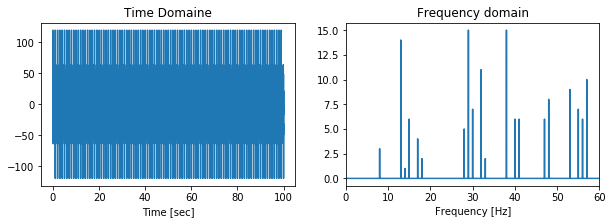

In [72]:
t_min = 0
t_max = 100
fs = 1000
t = np.arange(t_min, t_max, 1/fs)
freqs = [np.random.randint(1, 60) for _ in range(30)]

sig = mixed_sine(freqs, t)
sigX, freqs = fourier(sig, fs)

f, a  = plt.subplots(1, 2, figsize=(10, 3))
a[0].plot(t, sig)
a[0].set_title('Time Domaine')
a[0].set_xlabel('Time [sec]')
a[1].plot(freqs, 2 * np.abs(sigX))
a[1].set_xlim([0, 60])
a[1].set_title('Frequency domain')
a[1].set_xlabel('Frequency [Hz]')
plt.show()

In [73]:
def butter(f, btype, fs, order=7):
    if hasattr(f, '__iter__') and not isinstance(f, np.ndarray):
        f = np.array(f)
    nyq = np.round(fs / 2)
    f = f / nyq
    b, a = signal.butter(order, f, btype=btype)
    return b, a


def iir_impulse_response(b, a, fs):
    impulse = np.concatenate([np.zeros((1, 50000)).flatten(), np.array([1]), np.zeros((1, 50000)).flatten()])
    filtered = signal.filtfilt(b, a, impulse)
    fX, ff = fourier(filtered, fs)
    return filtered, fX, ff

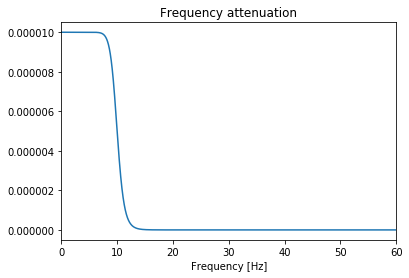

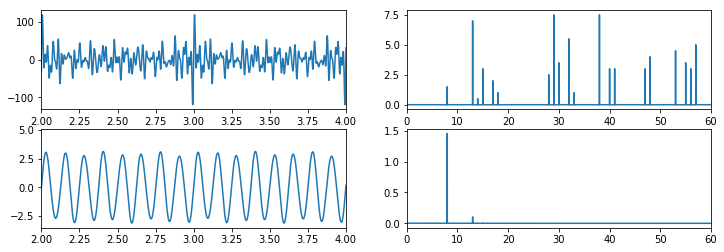

In [74]:
low = 10
b, a = butter(low, fs=fs, btype='lowpass', order=8)
iltered, fX, ff = iir_impulse_response(b, a, fs)

f, ax = plt.subplots()

ax.plot(ff, np.abs(fX))
ax.set_xlim([0, 60])
ax.set_title('Frequency attenuation')
ax.set_xlabel('Frequency [Hz]')
plt.show()

filtered = signal.filtfilt(b, a, sig)
filteredX, filtered_f = fourier(filtered, fs)
sigX, freqs = fourier(sig, fs)

f, ax = plt.subplots(2, 2, figsize=(12, 4))
ax[0, 0].plot(t, sig)
ax[0, 0].set_xlim([2, 4])
ax[1, 0].plot(t, filtered)
ax[1, 0].set_xlim([2, 4])

ax[0, 1].plot(freqs, np.abs(sigX))
ax[0, 1].set_xlim([0, 60])
ax[1, 1].plot(filtered_f, np.abs(filteredX))
ax[1, 1].set_xlim([0, 60])
plt.show()

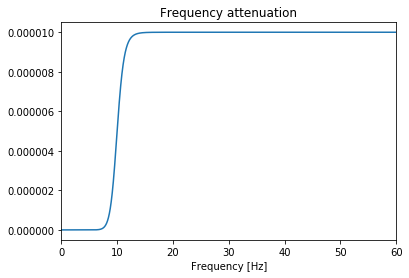

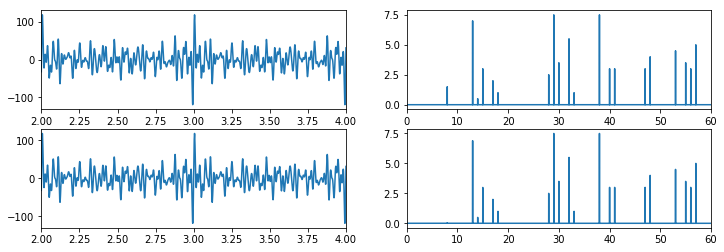

In [75]:
high = 10
b, a = butter(high, fs=fs, btype='highpass', order=8)
iltered, fX, ff = iir_impulse_response(b, a, fs)

f, ax = plt.subplots()

ax.plot(ff, np.abs(fX))
ax.set_xlim([0, 60])
ax.set_title('Frequency attenuation')
ax.set_xlabel('Frequency [Hz]')
plt.show()

filtered = signal.filtfilt(b, a, sig)
filteredX, filtered_f = fourier(filtered, fs)
sigX, freqs = fourier(sig, fs)

f, ax = plt.subplots(2, 2, figsize=(12, 4))
ax[0, 0].plot(t, sig)
ax[0, 0].set_xlim([2, 4])
ax[1, 0].plot(t, filtered)
ax[1, 0].set_xlim([2, 4])

ax[0, 1].plot(freqs, np.abs(sigX))
ax[0, 1].set_xlim([0, 60])
ax[1, 1].plot(filtered_f, np.abs(filteredX))
ax[1, 1].set_xlim([0, 60])
plt.show()

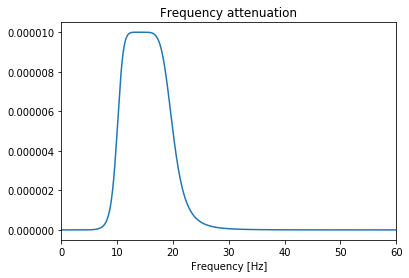

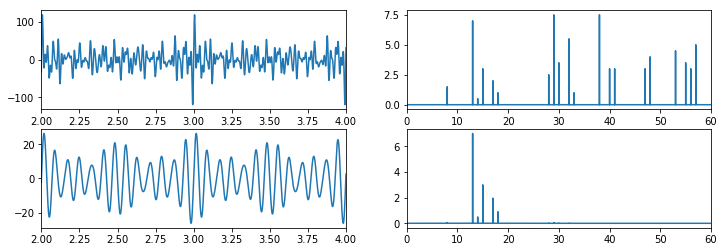

In [76]:
band = [10, 20]
b, a = butter(band, fs=fs, btype='bandpass', order=3)
iltered, fX, ff = iir_impulse_response(b, a, fs)

f, ax = plt.subplots()

ax.plot(ff, np.abs(fX))
ax.set_xlim([0, 60])
ax.set_title('Frequency attenuation')
ax.set_xlabel('Frequency [Hz]')
plt.show()

filtered = signal.filtfilt(b, a, sig)
filteredX, filtered_f = fourier(filtered, fs)
sigX, freqs = fourier(sig, fs)

f, ax = plt.subplots(2, 2, figsize=(12, 4))
ax[0, 0].plot(t, sig)
ax[0, 0].set_xlim([2, 4])
ax[1, 0].plot(t, filtered)
ax[1, 0].set_xlim([2, 4])

ax[0, 1].plot(freqs, np.abs(sigX))
ax[0, 1].set_xlim([0, 60])
ax[1, 1].plot(filtered_f, np.abs(filteredX))
ax[1, 1].set_xlim([0, 60])
plt.show()